#### Josh Canode, CST435

## Problem Statement:
The problem at hand is to optimize the layout of interior spaces, particularly rooms, by determining the ideal room dimensions and the number of furniture pieces for creating aesthetically pleasing and functional layouts. This problem arises in interior design and space planning, where it's essential to strike a balance between room size and the arrangement of furniture to maximize comfort and visual appeal. The goal is to automate the process of finding room configurations that are both practical and visually appealing, thereby enhancing the efficiency and quality of interior space design.


## Perceptron
#### To rate how furniture is arranged in a room based on the criteria of floor space coverage and the practicality of the layout, A perceptron approach is used to calculate the ratings. 

## Input Features:
1. Percentage of floor space covered by furniture (ranging from 0 to 100).
2. General rating of practicality of the layout (on a scale from 1 to 10).





In [129]:
import random
import math
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, confusion_matrix
import seaborn as sns
import itertools


## Creating the Room 
#### The following creates a set of rooms based using the following functions
place_furniture(grid, rows, columns): This function randomly places a 2x2 square of furniture ("f") within a room grid while ensuring that there is enough space for it.

min_distance_to_feature(grid): It calculates the minimum Euclidean distance from each piece of furniture ("f") to the nearest feature ("D" for door or "W" for window) within the room grid. The result is rounded to the nearest tenth and returned.

count_furniture(grid): This function counts the number of furniture pieces ("f") within the room grid and returns the count.

CreateRoom(num_rows, num_columns, num_furniture_pieces): This function generates a room grid with specified dimensions and a given number of furniture pieces. It randomly places features along the room edges (doors and windows) and fills the interior with empty spaces. It returns the resulting room grid.

generate_rooms(row, col, num_f): This function generates multiple room layouts and stores their characteristics (min distance and furniture count) as ordered pairs in a list. It ensures that the generated room is valid by checking if the minimum distance is not "inf" (indicating that furniture is not isolated from doors or windows).

Finally an example room is generated and shown at the bottom.

In [ ]:


def place_furniture(grid, rows, columns):
    # Randomly select a starting position for the furniture
    start_row = random.randint(1, rows - 3)  # Ensure space for a 2x2 square
    start_col = random.randint(1, columns - 3)

    # Place the furniture (2x2 square)
    for i in range(start_row, start_row + 2):
        for j in range(start_col, start_col + 2):
            grid[i][j] = "f"

def min_distance_to_feature(grid):
    # Initialize variables to store the minimum distance
    min_distance = float('inf')  # Initialize with a large value

    # Iterate through the grid to find "f" and "D" or "W"
    for i in range(len(grid)):
        for j in range(len(grid[0])):
            if grid[i][j] == "f":
                # Find the distance to the nearest "D" or "W" using Euclidean distance
                for x in range(len(grid)):
                    for y in range(len(grid[0])):
                        if grid[x][y] == "D" or grid[x][y] == "W":
                            distance = math.sqrt((i - x) ** 2 + (j - y) ** 2)
                            min_distance = min(min_distance, distance)

    # Return the minimum distance
    return round(min_distance, 1)


def count_furniture(grid):
    # Initialize a counter for "f"
    count = 0

    # Iterate through the grid and count "f"
    for row in grid:
        for cell in row:
            if cell == "f":
                count += 1

    # Return the count of "f"
    return count

def CreateRoom(num_rows, num_columns, num_furniture_pieces):
    # Define the dimensions of the grid
    rows = num_rows
    columns = num_columns

    # Initialize the grid as a 2D list
    grid = [[" " for _ in range(columns)] for _ in range(rows)]

    # Define the number of furniture pieces
    furniture_pieces = num_furniture_pieces

    for i in range(rows):
        for j in range(columns):
            if i == 0 or i == rows - 1 or j == 0 or j == columns - 1:
                # Randomly decide whether to place a feature or "E"
                if random.random() < 0.2:  # Adjust the probability as needed
                    # Randomly select a feature: "D" (door) or "W" (window)
                    if random.random() < 0.5:
                        # Place a door (at least 2 rows wide)
                        if i < rows - 1 and i > 0:
                            grid[i][j] = "D"
                            grid[i + 1][j] = "D"
                        else:
                            grid[i][j] = "E"
                    else:
                        # Place a random number of windows (between 2 and 5 rows wide)
                        if i < rows - 6 and i > 0:
                            window_height = random.randint(2, 5)
                            for k in range(window_height):
                                grid[i + k][j] = "W"
                        else:
                            grid[i][j] = "E"
                else:
                    grid[i][j] = "E"  # "E" for edges
            else:
                grid[i][j] = " "  # Space for the inside

    # Place furniture in the room based on the defined number of pieces
    for _ in range(furniture_pieces):
        place_furniture(grid, rows, columns)

    return grid  # Return the final grid


def generate_rooms(num_rooms):
    # Initialize a list to store room data
    room_data = []

    for _ in range(num_rooms):
        # Generate random room dimensions between 10 and 30
        rows = random.randint(10, 30)
        columns = random.randint(10, 30)

        # Generate a random number of pieces of furniture between 2 and 10
        num_furniture = random.randint(2, 10)

        while True:
            # Create a room and calculate min distance and count
            grid = CreateRoom(rows, columns, num_furniture)
            distance = min_distance_to_feature(grid)

            # Check if the distance is not "inf" (valid room)
            if distance != float('inf'):
                break  # Exit the loop if a valid room is created

        furniture_count = count_furniture(grid)

        # Store the room data
        room_data.append((rows, columns, num_furniture, distance, furniture_count))

    return room_data

# Generate random room data for 100 rooms
room_data_list = generate_rooms(100)

# Create a DataFrame from the room data
room_data_df = pd.DataFrame(room_data_list, columns=["rows", "columns", "num_furniture", "min_distance", "furniture_count"])

# Print the resulting DataFrame
print(room_data_df.head())

# Call CreateRoom to create one room
room_layout = CreateRoom(12, 12, 5)  # Adjust dimensions and furniture count as needed

# Example Room the layout of the room
for row in room_layout:
    print(" ".join(row))

distance = min_distance_to_feature(room_layout)
furniture_count = count_furniture(room_layout)
print("Min Distance:", distance)
print("Furniture Count:", furniture_count)


   rows  columns  num_furniture  min_distance  furniture_count
0    12       25              6           2.8               24
1    18       23              3           5.8               12
2    28       13              9           2.2               36
3    25       23              5           1.0               20
4    12       23             10           2.2               36
E E E E E E E E E E E E
E             f f     E
W             f f     E
E         f f         E
E         f f         D
W                     W
E               f f   E
E               f f   E
D f f                 E
E f f f               E
E   f f               E
E E E E E E E E E E E E
Min Distance: 1.0
Furniture Count: 19


## Data Prep and Preprocessing:

This code performs the following tasks:

- Generates random room data for 10,000 rooms.
- Calculates a "Rating" for each room based on dimensions and furniture.
- Classifies rooms as "good" or "bad" using a rating threshold.
- Displays the DataFrame and average rating.

This code is used for analyzing room data and classifying rooms as "good" or "bad" based on their ratings.


## Algorithm 
1. Initialize Weights: Initialize weights and bias to zero.
2. Select Input/Output Pair: Randomly select input/output pairs during training.
3. Compute Output: Compute predicted output based on input features.
4. Adjust Weights: Update weights using the perceptron update rule.
5. Repeat Until Convergence: Repeat steps 2-4 iteratively for learning.



In [130]:


# Initialize an empty list to store DataFrames
dfs = []

# Generate random room data for 100 rooms
room_data_list = generate_rooms(10000)

# Iterate through room_data_list and create a DataFrame for each room's data
for room_data in room_data_list:
    row, col, num_f, min_distance, furniture_count = room_data
    
    # Create a DataFrame for the current room's data
    room_df = pd.DataFrame({
        "rows": [row],
        "columns": [col],
        "num_furniture": [num_f],
        "min_distance": [min_distance],
        "furniture_count": [furniture_count]
    })
    
    # Append the DataFrame to the list
    dfs.append(room_df)


# Concatenate the list of DataFrames into a single DataFrame
room_data_df = pd.concat(dfs, ignore_index=True)

# Define weights (adjust as needed)
alpha = 0.5  # Weight for min_distance
beta = 0.5   # Weight for furniture_count

# Calculate ratings for each row in the DataFrame
room_data_df['Rating'] = alpha * room_data_df['min_distance'] + beta * room_data_df['furniture_count']


# Threshold for classifying ratings as "good" or "bad"
threshold = room_data_df['Rating'].mean()


# Create a new column 'Rating_Class' based on the threshold
room_data_df['Rating_Class'] = room_data_df['Rating'].apply(lambda x: 1 if x > threshold else 0)

# Print the DataFrame with the new column
print(room_data_df.head())

# Calculate the average rating
avg_rating = room_data_df['Rating'].mean()

# Print the average rating
print(f"Average Rating: {avg_rating}")


   rows  columns  num_furniture  min_distance  furniture_count  Rating  \
0    15       12              8           1.4               27   14.20   
1    24       29              7           4.5               25   14.75   
2    15       16              8           3.2               28   15.60   
3    10       26              8           1.0               30   15.50   
4    21       30              7           2.2               27   14.60   

   Rating_Class  
0             1  
1             1  
2             1  
3             1  
4             1  
Average Rating: 12.87245




## Define Input Features and Target Var:
Select the relevant input features from your DataFrame, which are the 'rows,' 'columns,' and 'num_furniture' columns.


This code prepares the data for machine learning by defining the target variable and extracting the input features. It then splits the data into training and testing sets for model evaluation.


In [131]:
# Define the target variable 'Rating_Class'
y = room_data_df['Rating_Class'].values
# Extract the input features from the DataFrame
X = room_data_df[['rows', 'columns', 'num_furniture']].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Define the Perceptron Model:

Initialize the weights and bias for the perceptron algorithm.
Define an activation function (commonly the step function for perceptrons).
Set hyperparameters like learning rate and the number of epochs (iterations).


In [ ]:


class Perceptron:
    def __init__(self, learning_rate=0.01, n_epochs=4000):
        self.learning_rate = learning_rate
        self.n_epochs = n_epochs

    def fit(self, X, y):
        # Initialize weights and bias
        self.weights = np.zeros(X.shape[1])
        self.bias = 0

        for _ in range(self.n_epochs):
            for xi, target in zip(X, y):
                # Calculate the predicted value
                predicted = self.predict(xi)
                # Update weights and bias based on the perceptron update rule
                update = self.learning_rate * (target - predicted)
                self.weights += update * xi
                self.bias += update

    def predict(self, X):
        # Calculate the dot product of weights and input features and add bias
        z = np.dot(X, self.weights) + self.bias
        # Apply an activation function (e.g., step function)
        return np.where(z >= 0, 1, -1)


## Create an instance of the Perceptron class

This code segment trains a Perceptron model for binary classification. It initializes the model, trains it with the specified parameters, and then uses it to make predictions on the test data.


In [ ]:
# Create an instance of the Perceptron class
perceptron = Perceptron(learning_rate=0.0001, n_epochs=500)

# Train the perceptron model
perceptron.fit(X_train, y_train)

y_pred = perceptron.predict(X_test)



To evaluate the binary predictions made by the Perceptron model, we apply a threshold of 0.5 to convert the continuous predictions into binary outcomes. We then calculate the Mean Squared Error (MSE) and Mean Absolute Error (MAE) to assess the model's performance.

The MSE and MAE are calculated as follows:

- MSE (Mean Squared Error): Measures the average squared difference between the predicted values and the actual values.
- MAE (Mean Absolute Error): Measures the average absolute difference between the predicted values and the actual values.

Here are the computed errors:

- Mean Squared Error: 0.1445
- Mean Absolute Error: 0.1445

In [ ]:


# Apply threshold of 0.5 to convert predictions to binary
y_pred_binary = (y_pred >= 0.5).astype(int)

# Continue with evaluating the binary predictions
mse = mean_squared_error(y_test, y_pred_binary)
mae = mean_absolute_error(y_test, y_pred_binary)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")


Mean Squared Error: 0.1445
Mean Absolute Error: 0.1445


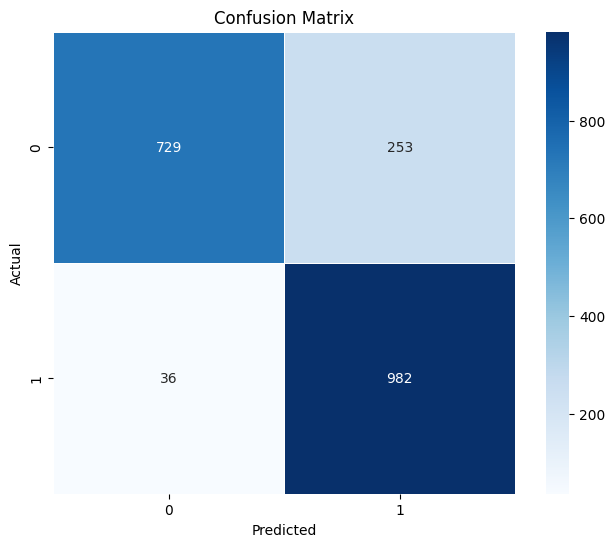

[[729 253]
 [ 36 982]]


In [ ]:

# Compute the confusion matrix for binary predictions
cm = confusion_matrix(y_test, y_pred_binary)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", linewidths=0.5, square=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

print(cm)


## Results
**Confusion Matrix (CM):**
- True Positives (TP): 982
- False Positives (FP): 253
- True Negatives (TN): 729
- False Negatives (FN): 36

**Mean Squared Error (MSE):** 0.1445

**Mean Absolute Error (MAE):** 0.1445

In the confusion matrix, we see how well the model classified instances into two classes. With a lower MSE and MAE, the model's predictions are relatively accurate. The model has a higher count of true positives (TP), indicating good performance in classifying positive instances.


### Finding the Best Room Layout Combination

- The code searches for the optimal room dimensions and furniture count combination that maximizes the probability of having a "good" room layout.
- It iterates through various combinations, predicting room quality using a perceptron model.
- The combination with the highest probability of being "good" is recorded.
- The final best combination and its associated probability are displayed.


In [132]:

# Define the range of values to test for room dimensions and furniture count
room_dimensions = range(10, 21)  # Adjust the range as needed
furniture_count = range(0, 11)   # Adjust the range as needed

best_combination = None
best_probability = 0

# Iterate through all combinations of room dimensions and furniture count
for dims, count in itertools.product(room_dimensions, furniture_count):
    # Create a test input for the perceptron model
    test_input = np.array([[dims, dims, count]])

    # Predict whether it's a good or bad room layout
    prediction = perceptron.predict(test_input)

    # Calculate the probability of being a "good" room layout
    probability = prediction.mean()

    # Check if this combination has a higher probability than the best one found so far
    if probability > best_probability:
        best_combination = (dims, dims, count)
        best_probability = probability

print(f"Best combination: Dimensions {best_combination[0]}x{best_combination[1]}, Furniture Count {best_combination[2]}")
print(f"Probability of being a 'good' room layout: {best_probability}")


Best combination: Dimensions 10x10, Furniture Count 5
Probability of being a 'good' room layout: 1.0


### Creating a Room with Best Dimensions and Furniture Count

- The code creates a room layout with the dimensions and furniture count previously determined as the "best."
- It ensures the generated room layout is valid by checking the minimum distance to features.
- The layout of the room, its minimum distance, furniture count, and a computed rating are displayed.


In [ ]:

# Define the best dimensions and number of furniture pieces found previously
best_dimensions = 12  # Replace with the best room dimensions
best_furniture_count = 5  # Replace with the best number of furniture pieces

def CreateRoomWithBestDimensionsAndFurniture(num_rows, num_columns, num_furniture_pieces):
    while True:
        # Create a room with the specified dimensions and furniture count
        grid = CreateRoom(num_rows, num_columns, num_furniture_pieces)

        # Calculate the minimum distance to features
        distance = min_distance_to_feature(grid)

        # Check if the distance is not "inf" (valid room)
        if distance != float('inf'):
            return grid, distance

# Create a room with the best dimensions and furniture count
room_layout, distance = CreateRoomWithBestDimensionsAndFurniture(best_dimensions, best_dimensions, best_furniture_count)

# Example Room the layout of the room
for row in room_layout:
    print(" ".join(row))

print("Min Distance:", distance)
print("Furniture Count:", count_furniture(room_layout))

Rating = alpha * distance + beta * count_furniture(room_layout)

print("Rating: ", Rating)


E E E E E E E E E E E E
E                     E
D                     E
E                     E
E                     E
E         f f f       E
E         f f f       E
E             f f     E
E   f f       f f     D
E   f f       f f     E
E                     D
E E E E E E E E E E E E
Min Distance: 3.0
Furniture Count: 16
Rating:  9.5
